In [1]:
import matplotlib
matplotlib.use("nbagg")

import numpy as np
import matplotlib.pyplot as plt

from tkinter import Tk
from tkinter.filedialog import askopenfilename


In [2]:
def readInPlot():
    root = Tk()
    filename = askopenfilename()
    f = open(filename,'r')

    root.withdraw()

    index = 1;
    xList = []
    yList = []
    stdList = []

    for line in f:
        newline = line.split()

        if len(newline) ==2:
            if index == 1:
                xTitle = newline[0]
                yTitle = newline[1]
                #print(xTitle)
                #print(yTitle)
            else:
                xList.append(float(newline[0]))
                
                mobility = float(newline[1])
                conductivity = n*e*mobility
                yList.append(conductivity)
        elif len(newline) == 3:
            if index == 1:
                xTitle = newline[0]
                yTitle = newline[1]
            else:
                xList.append(float(newline[0]))
                yList.append(float(newline[1]))
                stdList.append(float(newline[2]))
        index += 1
    f.close()

    xArray = np.asarray(xList)
    yArray = np.asarray(yList)
    
    plotArray = []
    plotArray.append(xArray)
    plotArray.append(yArray)
    plotArray.append(xTitle)
    plotArray.append(yTitle)
    if len(stdList) != 0:
        stdArray = np.asarray(stdList)
        plotArray.append(stdArray)
        #plt.plot(xArray,yArray,linestyle = '--',marker='o')
        #plt.xlabel(xTitle)
        #plt.ylabel(yTitle)
    #else:
    #    stdArray = np.asarray(stdList)
    #    plt.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = '--',marker = 'o')
        #plt.xlabel(xTitle)
        #plt.ylabel(yTitle)
        
    return plotArray

<IPython.core.display.Javascript object>


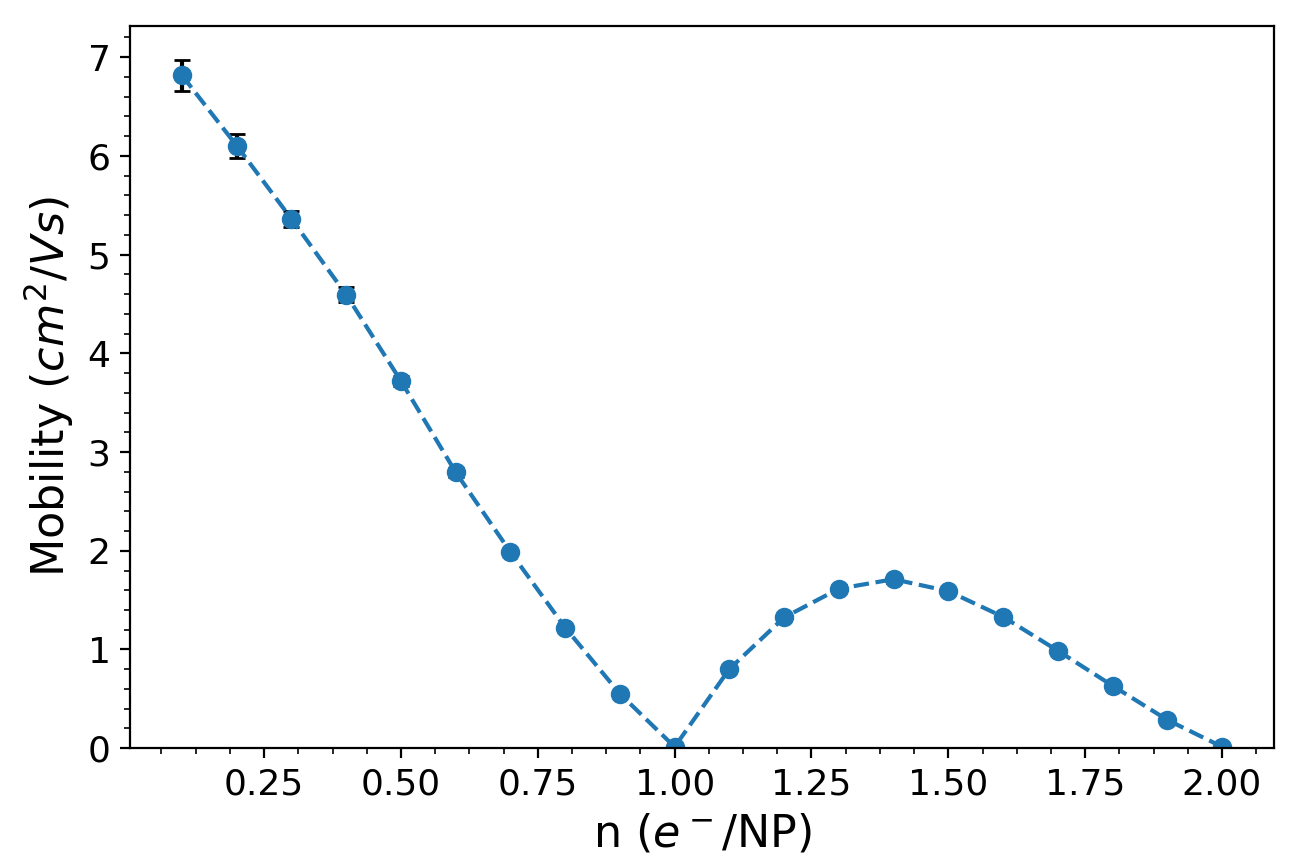

In [16]:
i = 1
plotNumber  = 1

if plotNumber == 1:
    plotArray = readInPlot()
    fig, ax = plt.subplots(figsize=(6.5,4.3))
    plt.subplots_adjust(left=0.1, bottom = 0.13, right = 0.98, top = 0.97, wspace =0, hspace = 0)
    plt.rc('axes', titlesize=12)  
    if len(plotArray) == 4:
        xArray = plotArray[0]
        yArray = plotArray[1]
        plt.plot(xArray,yArray,linestyle = '--',marker='o')
    else: 
        xArray = plotArray[0]/800
        yArray = plotArray[1]
        stdArray = plotArray[4]
        plt.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = '--',marker = 'o',ecolor='black', capsize = 3)
    plt.yscale("linear")
    plt.ylim(0)
    plt.xlabel("n ($e^-$/NP)",fontsize=16)
    plt.ylabel("Mobility ($cm^{2}/Vs$)",fontsize=16)
    ax.minorticks_on()
    plt.setp(ax.get_xticklabels(),fontsize=13)
    plt.setp(ax.get_yticklabels(),fontsize=13)
    plt.savefig('MobilityVsDensity.png',dpi=300, format='png')
    
    #plt.xlabel("Diameter (nm)")
    #plt.ylabel("Mobility ($cm^{2}/Vs$)")
    #plt.title("Mobility vs Nanoparticle Diameter: Fixed Electron Number")
    plt.show()
        
elif plotNumber > 1:
    fig, ax1 = plt.subplots()
    while i <= plotNumber:
        plotArray = readInPlot()
        if len(plotArray) == 2:
            xArray = plotArray[0]
            yArray = plotArray[1]
            labelString = ("Screening Factor: %i" %i)
            plotList.append(ax1.plot(xArray,yArray,linestyle = '--',marker='.',label = labelString))
        else: 
            xArray = plotArray[0]
            yArray = plotArray[1]
            stdArray = plotArray[4]
            labelString = ("Screening Factor: %i" %i)
            plotList.append(ax1.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = '--',marker = 'o', label = labelString, ecolor='blue'))
        i += 1

    ax2 = ax1.twinx()
    ax2.plot(xArray,e_per_npArray,linestyle = '-',marker ='s',label = 'electrons per np',color='brown')
    ax2.set_ylabel('electrons per np')
    ax2.set_yscale("linear")
    ax2.legend(loc = 4)

    ax1.set_yscale("linear")
    ax1.set_xlabel(plotArray[2])
    ax1.set_ylabel(plotArray[3])
    ax1.legend(handles = plotList)

    plt.title("Conductivity vs NP Diameter: Linear Disorder")
    fig.tight_layout()
    plt.show()